In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('loan churn train.csv')
test=pd.read_csv('loan churn test.csv')
copy=pd.read_csv('loan churn test.csv')

In [6]:
test.shape

(110023, 13)

In [8]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [9]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [12]:
df['Exited'].value_counts()

0    130113
1     34921
Name: Exited, dtype: int64

In [13]:
df['Exited'].value_counts().sum()

165034

<Axes: xlabel='Geography', ylabel='Count'>

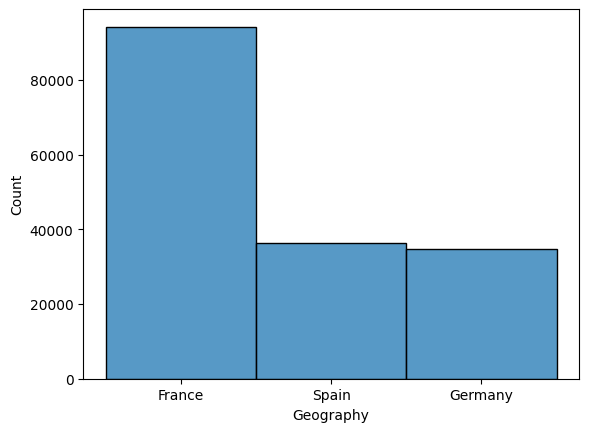

In [14]:
sns.histplot(df['Geography'])

In [15]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

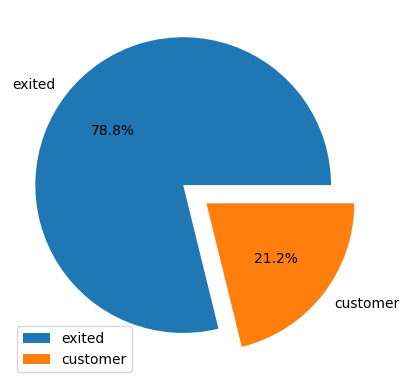

In [16]:
unique_value, count = np.unique(df['Exited'],return_counts=True)
explode = [0.1]*len(count)
plt.pie(x=count, labels= ["exited","customer"],autopct= '%1.1f%%',explode= explode)
plt.legend()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le= LabelEncoder()

In [19]:
df['Gender']=le.fit_transform(df["Gender"])
df['Geography']=le.fit_transform(df["Geography"])

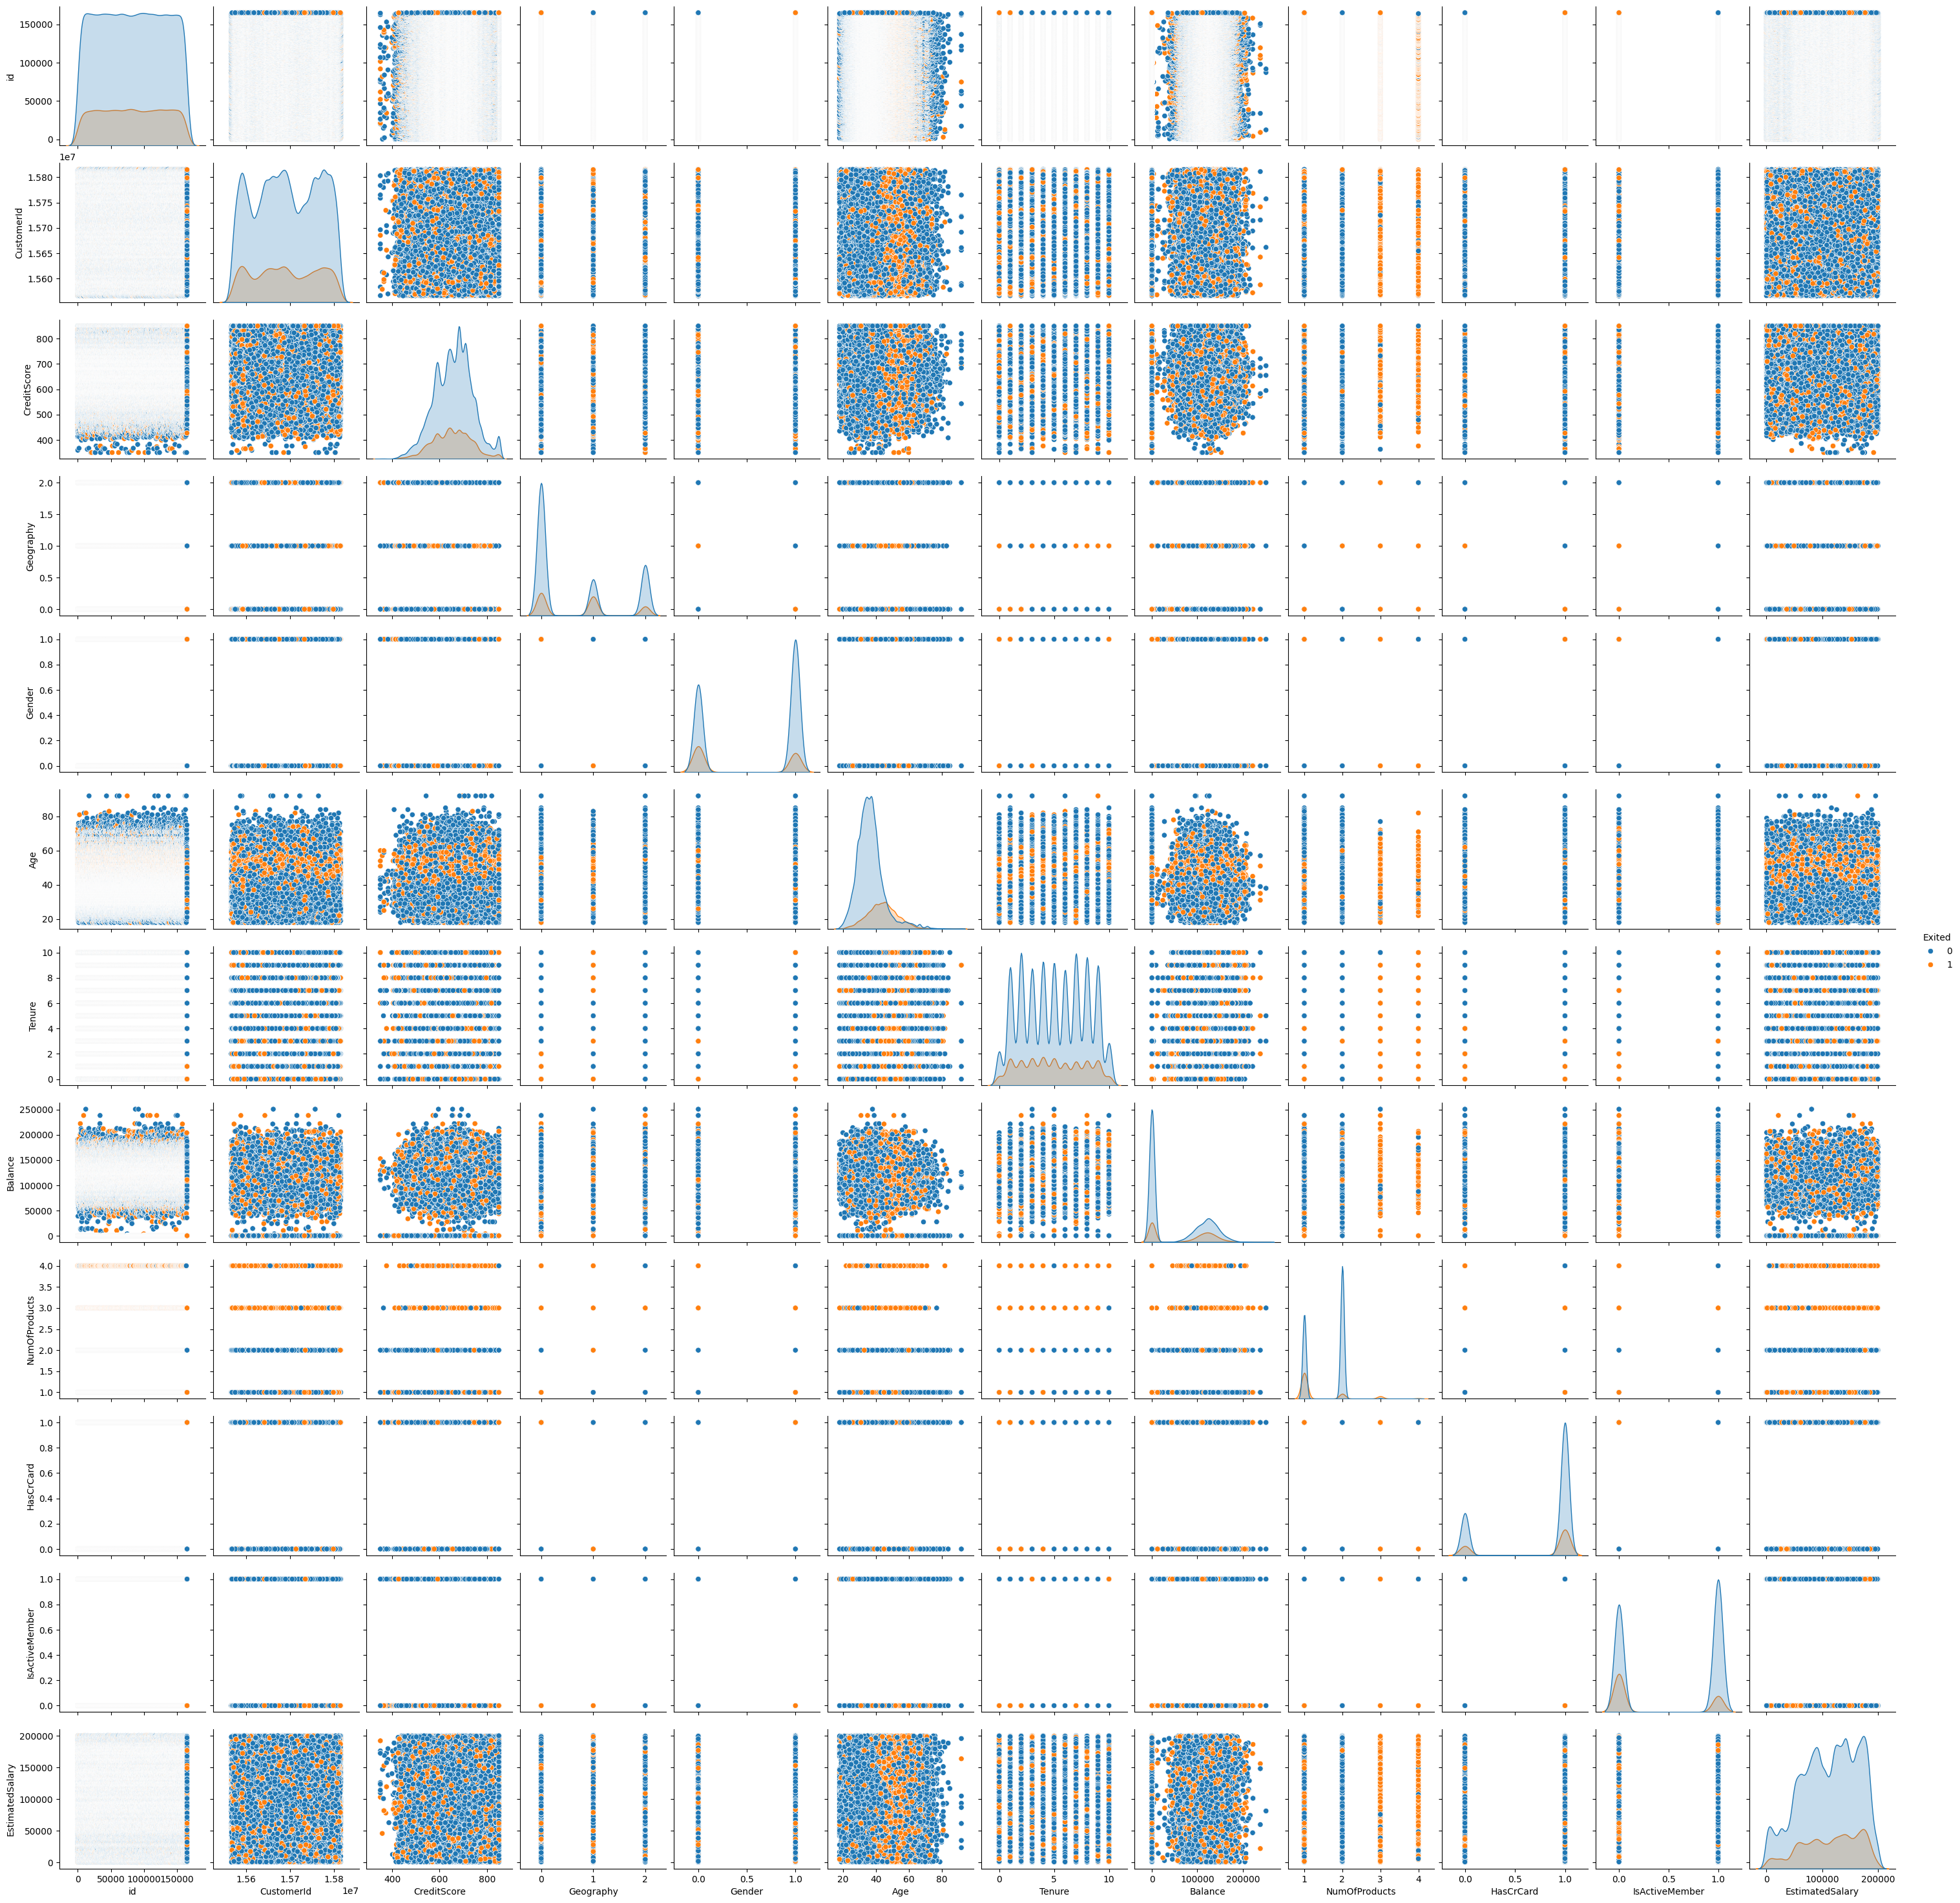

In [86]:
sns.pairplot(df,hue='Exited')

In [33]:
x = df.drop(['id','CustomerId','Surname','Exited'],axis =1)

<Figure size 2000x1800 with 0 Axes>

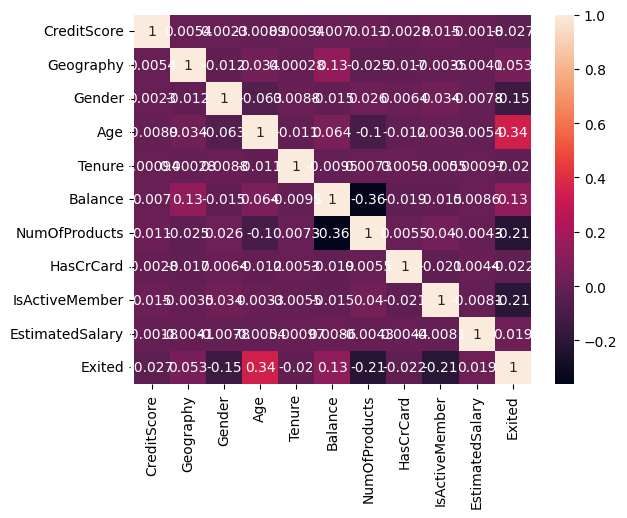

<Figure size 2000x1800 with 0 Axes>

In [31]:
sns.heatmap(x.corr(), annot=True)
plt.figure(figsize=(20, 18))

In [32]:
y=df['Exited']

In [35]:
from sklearn.decomposition import PCA

In [36]:
pcal=PCA(n_components=0.50)

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [38]:
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=123, test_size=0.2, stratify=y)

In [39]:
pcal.fit_transform(x_train,y_train)

array([[ 98978.20856283],
       [110688.50803906],
       [ 65400.39397393],
       ...,
       [ 55947.3162622 ],
       [-54288.0523034 ],
       [-55603.2902642 ]])

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
lr=RandomForestClassifier(max_depth=8, max_features= 1.0, max_samples= 0.75, n_estimators= 20)

In [45]:
lr.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=1.0, max_samples=0.75,
                       n_estimators=20)

In [46]:
y_pred=lr.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [48]:
confusion_matrix(y_test,y_pred)

array([[24694,  1329],
       [ 3234,  3750]])

In [49]:
 accuracy_score(y_pred,y_test)

0.8617565970854667

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     26023
           1       0.74      0.54      0.62      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007



In [51]:
copy.shape

(110023, 13)

In [52]:
from xgboost import XGBClassifier

In [53]:
model = XGBClassifier(
    colsample_bytree=0.8,
    eta=0.1,
    eval_metric='logloss',
    max_depth=3,
    objective='binary:logistic',
    subsample=0.8
)

In [54]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [55]:
xy_pred=model.predict(x_test)

In [56]:
print(accuracy_score(xy_pred,y_test))

0.8622413427454783


In [57]:
print(confusion_matrix(xy_pred,y_test))

[[24827  3351]
 [ 1196  3633]]


In [58]:
params = {
    'objective': ['binary:logistic'],  # Binary classification
    'eval_metric': ['logloss'],  # Evaluation metric
    'eta': [0.1],  # Learning rate
    'max_depth': [3],  # Maximum depth of a tree
    'subsample': [0.8],  # Subsample ratio of the training instance
    'colsample_bytree':[ 0.8]  # Subsample ratio of columns when constructing each tree
}

In [60]:
xgb_grid= GridSearchCV(estimator=model, param_grid= params, cv=5, n_jobs=-1, verbose= 2)


In [61]:
xgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=0.1,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learnin...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'eta': [0.1],
                         'eval_metric': ['logloss'], 'max_depth': [3],
                         'objective': ['binary:logistic'], 'subsample': [0.8]},
             verbose=2)

In [62]:
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'eta': 0.1,
 'eval_metric': 'logloss',
 'max_depth': 3,
 'objective': 'binary:logistic',
 'subsample': 0.8}

In [63]:
xgb_grid.best_score_

0.8651866454926388

In [64]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.2 MB/s eta 0:00:00


In [65]:
from catboost import CatBoostClassifier

In [66]:
cb= CatBoostClassifier(loss_function='MultiClass')

In [67]:
cb.fit(x_train,y_train)

Learning rate set to 0.101503
0:	learn: 0.6385226	total: 174ms	remaining: 2m 53s
1:	learn: 0.5935937	total: 290ms	remaining: 2m 24s
2:	learn: 0.5558302	total: 391ms	remaining: 2m 9s
3:	learn: 0.5247155	total: 545ms	remaining: 2m 15s
4:	learn: 0.4981858	total: 658ms	remaining: 2m 10s
5:	learn: 0.4762820	total: 770ms	remaining: 2m 7s
6:	learn: 0.4572416	total: 870ms	remaining: 2m 3s
7:	learn: 0.4401102	total: 1.02s	remaining: 2m 7s
8:	learn: 0.4257443	total: 1.18s	remaining: 2m 9s
9:	learn: 0.4132655	total: 1.3s	remaining: 2m 8s
10:	learn: 0.4018593	total: 1.44s	remaining: 2m 9s
11:	learn: 0.3926611	total: 1.59s	remaining: 2m 10s
12:	learn: 0.3846849	total: 1.73s	remaining: 2m 11s
13:	learn: 0.3778684	total: 1.87s	remaining: 2m 11s
14:	learn: 0.3708884	total: 1.93s	remaining: 2m 6s
15:	learn: 0.3655284	total: 2.02s	remaining: 2m 4s
16:	learn: 0.3606153	total: 2.12s	remaining: 2m 2s
17:	learn: 0.3557804	total: 2.21s	remaining: 2m
18:	learn: 0.3522363	total: 2.31s	remaining: 1m 59s
19:	lea

In [76]:
cb_pred=cb.predict(x_test)

In [78]:
print(classification_report(cb_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     27826
           1       0.55      0.74      0.63      5181

    accuracy                           0.86     33007
   macro avg       0.75      0.81      0.77     33007
weighted avg       0.89      0.86      0.87     33007



In [79]:
print(accuracy_score(cb_pred,y_test))

0.8633926136880056


In [80]:
param_grid = {
    'iterations': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 4, 5],
}
cb_grid=GridSearchCV(estimator=cb, param_grid= param_grid, cv=5, n_jobs=-1, verbose= 2)

In [81]:
cb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6400521	total: 59.3ms	remaining: 11.8s
1:	learn: 0.5959100	total: 147ms	remaining: 14.6s
2:	learn: 0.5593733	total: 220ms	remaining: 14.5s
3:	learn: 0.5288582	total: 280ms	remaining: 13.7s
4:	learn: 0.5028802	total: 359ms	remaining: 14s
5:	learn: 0.4810361	total: 435ms	remaining: 14.1s
6:	learn: 0.4620848	total: 528ms	remaining: 14.6s
7:	learn: 0.4460212	total: 613ms	remaining: 14.7s
8:	learn: 0.4320412	total: 699ms	remaining: 14.8s
9:	learn: 0.4197435	total: 797ms	remaining: 15.2s
10:	learn: 0.4093474	total: 863ms	remaining: 14.8s
11:	learn: 0.3997515	total: 902ms	remaining: 14.1s
12:	learn: 0.3912938	total: 942ms	remaining: 13.5s
13:	learn: 0.3842544	total: 985ms	remaining: 13.1s
14:	learn: 0.3779420	total: 1.03s	remaining: 12.7s
15:	learn: 0.3724047	total: 1.07s	remaining: 12.3s
16:	learn: 0.3666583	total: 1.11s	remaining: 12s
17:	learn: 0.3627265	total: 1.15s	remaining: 11.6s
18:	learn: 0.3589912	total: 1.19s

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7c6356746cb0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5], 'iterations': [100, 150, 200],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [82]:
cb_grid.best_params_

{'depth': 5, 'iterations': 200, 'learning_rate': 0.1}

In [83]:
cb_grid.best_score_

0.8656789724747821